In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

In [9]:
plt.style.use("ggplot")
np.random.seed(123)

In [10]:
#正方形1*1
#半分を赤、半分を青とする
#[0, 1]の一様乱数乱数を発生させ赤に入る確率=赤の面積/(赤の面積+青の面積)=0.5

In [11]:
#モンテカルロ法とは乱数を使った数値計算手法
#円の中に入る確率(4/pie)/1(全体の面積)=0.785
#確率が分かれば、pieが求められる

In [12]:
#乱数を打つ数
NMC = 100

#[0,1]の乱数を発生させる
xmc =np.random.rand(NMC)
ymc =np.random.rand(NMC)

#原点からの距離
r = (xmc**2 + ymc**2)**0.5

#入ったかどうかの計算(入ったら1, 入ってなければ0)
accept = np.where(r<1, 1, 0)

#確率の計算
accept_ratio = np.sum(accept) / NMC

print(accept_ratio)

0.82


In [13]:
#乱数を打つ数
NMC = 1000

#[0,1]の乱数を発生させる
xmc =np.random.rand(NMC)
ymc =np.random.rand(NMC)

@interact(mcs=(0, NMC, 1))
def animation(mcs=0):
    plt.figure(figsize=(6, 6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    #円をグラフに描きたい
    x=np.arange(0 ,1 ,0.001)
    y=(1 - x**2)**0.5 #x^2 + y^2 =1 円の公式より
    y2 = np.ones(x.shape[0])
    plt.plot(x, y)
    
    #xの外、中に色を付ける
    plt.fill_between(x, y, alpha=0.3)
    plt.fill_between(x, y, y2, alpha=0.3)

    #原点からの距離
    r = (xmc[:mcs]**2 + ymc[:mcs]**2)**0.5

    #入ったかどうかの計算(入ったら1, 入ってなければ0)
    accept = np.where(r<1, 1, 0)

    #確率の計算
    accept_ratio = np.sum(accept) / mcs
    
    plt.scatter(xmc[:mcs], ymc[:mcs], color="black", marker=".")
    plt.show()
    print("Monte Carlo : ", accept_ratio)
    print("Analytics Solution : ", np.pi/4.0)

interactive(children=(IntSlider(value=0, description='mcs', max=1000), Output()), _dom_classes=('widget-intera…

In [38]:
pi_mcs = []

#乱数を打つ数
NMC = 2000

#[0,1]の乱数を発生させる
xmc =np.random.rand(NMC)
ymc =np.random.rand(NMC)
for mcs in range(1, NMC):
    r = (xmc[:mcs] **2 + ymc[:mcs] **2)**0.5
    accept = np.where(r<1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

In [39]:
pi_x=np.arange(len(pi_mcs))+1

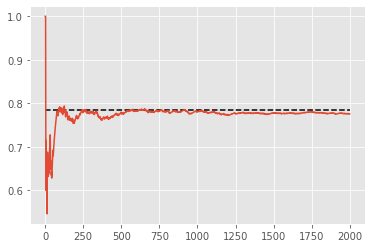

In [40]:
plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles="dashed")